In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [55]:
!pip install -q tensorflow-datasets

In [56]:
import tensorflow_datasets as tfds

(ds_train, ds_test), info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)


In [57]:
# Pretvaranje ds_train u NumPy nizove
x_train_list = []
y_train_list = []
for image, label in ds_train:
    x_train_list.append(image.numpy()) # Pretvaramo tensor u NumPy niz
    y_train_list.append(label.numpy())

x_train = np.array(x_train_list)
y_train = np.array(y_train_list)

# Pretvaranje ds_test u NumPy nizove
x_test_list = []
y_test_list = []
for image, label in ds_test:
    x_test_list.append(image.numpy()) # Pretvaramo tensor u NumPy niz
    y_test_list.append(label.numpy())

x_test = np.array(x_test_list)
y_test = np.array(y_test_list)

print(f"Oblici nakon podjele:\nx_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

Oblici nakon podjele:
x_train: (88800, 28, 28, 1), y_train: (88800,)
x_test: (14800, 28, 28, 1), y_test: (14800,)


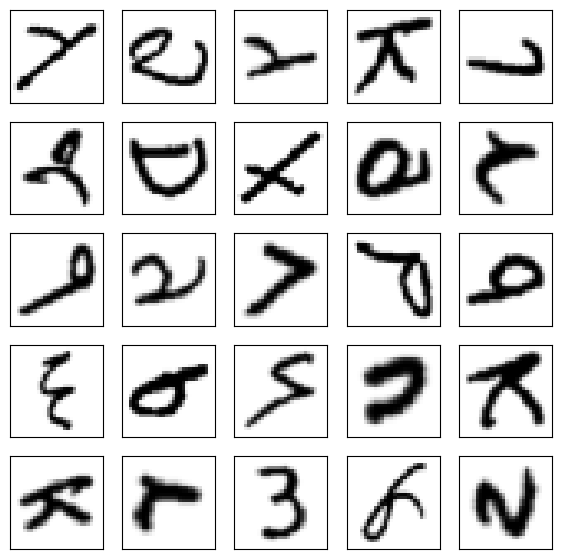

In [58]:
fig = plt.figure(figsize=(7, 7))

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='binary')

In [59]:
x_train = x_train.reshape((88800, 28, 28, 1))
x_train = x_train.astype('float32') / 255

In [60]:
x_test = x_test.reshape((14800, 28, 28, 1))
x_test = x_test.astype('float32') / 255

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Input

In [62]:
model1 = Sequential()
model1.add(Input(shape=(28, 28, 1)))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(37, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,269 (1.23 MB)

 Trainable params: 321,269 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

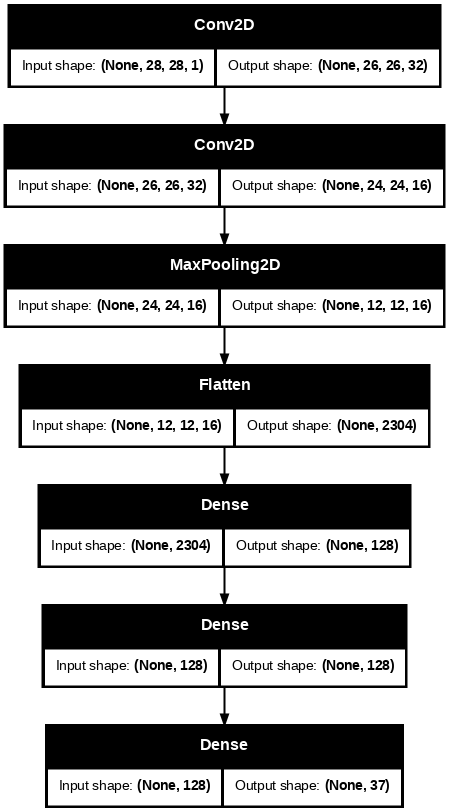

In [63]:
tf.keras.utils.plot_model(model=model1, dpi=72, show_shapes=True)

In [64]:
model1.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6897 - loss: 1.0670 - val_accuracy: 0.8882 - val_loss: 0.3373
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9065 - loss: 0.2835 - val_accuracy: 0.9128 - val_loss: 0.2696
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9230 - loss: 0.2231 - val_accuracy: 0.9155 - val_loss: 0.2613
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9362 - loss: 0.1810 - val_accuracy: 0.9174 - val_loss: 0.2517
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9438 - loss: 0.1516 - val_accuracy: 0.9180 - val_loss: 0.2627


In [65]:
prediction1=model1.predict(x_test)
prediction1[1]

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.4592346e-14, 1.1176831e-05, 6.9916141e-06, 1.4022006e-10,
       3.2099631e-10, 8.4209341e-12, 2.4797814e-10, 1.4080311e-08,
       9.9992847e-01, 1.0191236e-07, 8.2199785e-09, 3.3733249e-05,
       6.0640099e-07, 8.8396650e-09, 3.8921694e-06, 2.6670560e-11,
       1.6944556e-12, 6.8516121e-10, 4.0877845e-07, 1.9439677e-11,
       1.3858535e-05, 3.7660121e-07, 1.6356026e-11, 3.8033920e-10,
       6.8457929e-08, 1.9210619e-07, 1.1766650e-12, 4.2635654e-13,
       3.2308283e-14, 3.6903995e-13, 5.2411119e-14, 1.5508604e-14,
       8.9304866e-12, 2.6911017e-12, 1.1657668e-14, 4.0319009e-16,
       7.2050249e-14], dtype=float32)

In [66]:
loss1, accuracy1=model1.evaluate(x_train,y_train)
print(loss1)
print(accuracy1)

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9510 - loss: 0.1318
0.15734100341796875
0.9448536038398743


In [67]:
loss1, accuracy1=model1.evaluate(x_test,y_test)
print(loss1)
print(accuracy1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9068 - loss: 0.2894
0.2921770513057709
0.9073648452758789


In [68]:
model2 = Sequential()
model2.add(Input(shape=(28, 28, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(37, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,765 (475.64 KB)

 Trainable params: 121,765 (475.64 KB)

 Non-trainable params: 0 (0.00 B)

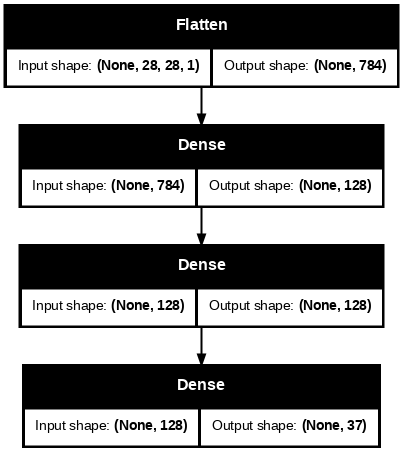

In [69]:
tf.keras.utils.plot_model(model=model2, dpi=72, show_shapes=True)

In [70]:
model2.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6270 - loss: 1.3318 - val_accuracy: 0.8316 - val_loss: 0.5531
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8463 - loss: 0.4975 - val_accuracy: 0.8602 - val_loss: 0.4477
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8780 - loss: 0.3838 - val_accuracy: 0.8657 - val_loss: 0.4357
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8945 - loss: 0.3256 - val_accuracy: 0.8871 - val_loss: 0.3684
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9064 - loss: 0.2841 - val_accuracy: 0.8892 - val_loss: 0.3611


In [71]:
prediction2=model2.predict(x_test)
prediction2[1]

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.79958382e-10, 8.27710086e-04, 6.02879853e-04, 8.67852457e-09,
       5.76663206e-06, 6.62449656e-06, 2.17593377e-04, 7.28469513e-06,
       9.79370236e-01, 5.44027571e-05, 7.17310422e-06, 1.65041368e-02,
       2.56257972e-05, 3.37802740e-05, 1.43123194e-04, 5.68390002e-09,
       1.09986175e-07, 2.05665788e-06, 2.39154906e-04, 2.11258453e-06,
       5.97274979e-04, 5.83627443e-05, 5.34882645e-07, 4.35922584e-06,
       1.11179659e-03, 1.77235343e-04, 5.50550055e-07, 6.69458169e-11,
       1.99973121e-10, 2.14410469e-11, 4.32140712e-11, 3.40025438e-11,
       7.17588489e-11, 3.57286874e-11, 2.45906281e-11, 5.78052016e-11,
       1.80317011e-11], dtype=float32)

In [72]:
loss2, accuracy2=model2.evaluate(x_train,y_train)
print(loss2)
print(accuracy2)

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9201 - loss: 0.2400
0.26279303431510925
0.9146509170532227


In [73]:
loss2, accuracy2=model2.evaluate(x_test,y_test)
print(loss2)
print(accuracy2)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8779 - loss: 0.3883
0.39040693640708923
0.8770270347595215


In [74]:
pogresni = []
for i, (pred, labela) in enumerate(zip(prediction2, y_test)):
  if np.argmax(pred) != labela:
    pogresni.append((i, np.argmax(pred), labela, prediction2[i]))

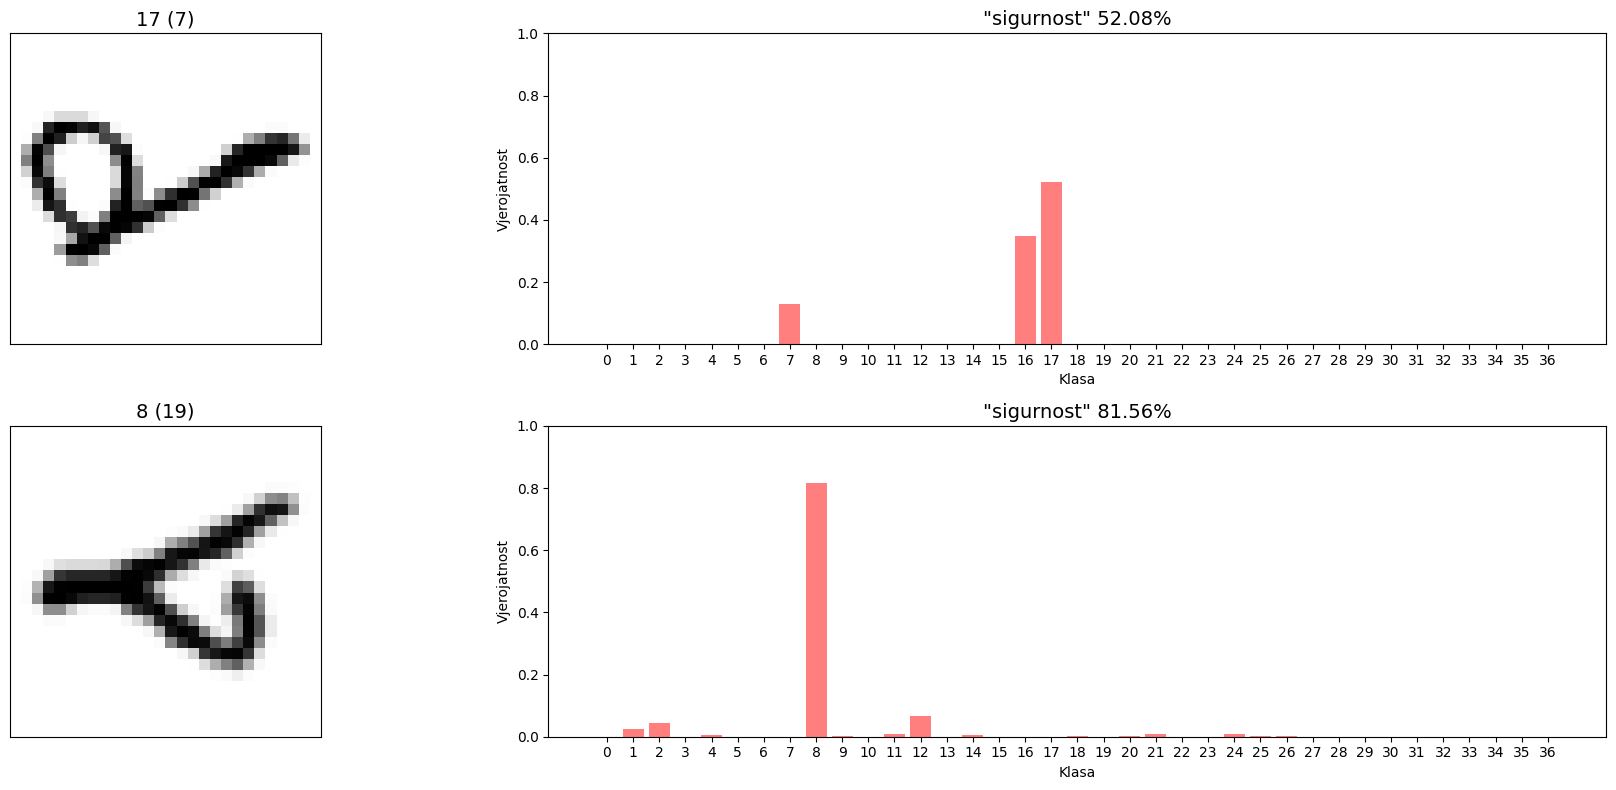

In [75]:
fig = plt.figure(figsize=(20, 8))
cnt = 0

for idx, (i, pred, tocno, pred_vjerojatnosti) in enumerate(random.sample(pogresni, 2)):

  ax1 = plt.subplot(2, 2, cnt + 1)
  plt.title("{} ({})".format(pred, tocno), fontsize=14)
  plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
  plt.xticks([]), plt.yticks([])


  ax2 = plt.subplot(2, 2, cnt + 2)
  sigurnost = pred_vjerojatnosti[pred] * 100
  plt.title("\"sigurnost\" {:.2f}%".format(sigurnost), fontsize=14)
  xs = np.arange(len(pred_vjerojatnosti))
  plt.bar(xs, pred_vjerojatnosti, color="red", alpha=0.5)
  plt.xticks(xs)
  plt.ylim([0, 1])
  plt.xlabel("Klasa")
  plt.ylabel("Vjerojatnost")

  cnt += 2

plt.tight_layout()
plt.show()

In [76]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=fetch_california_housing()
x, y=data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [77]:
model3 = Sequential()
model3.add(Input(shape=(x_train.shape[1],)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1))

model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model3.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

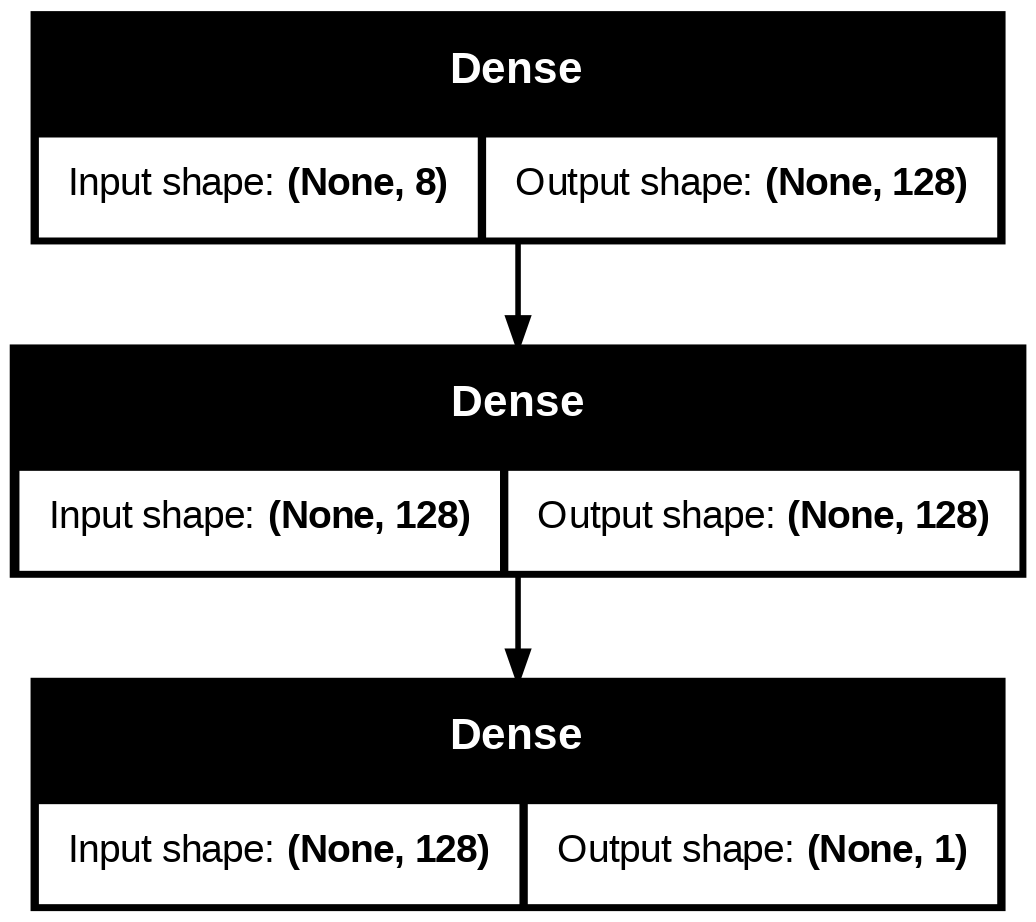

In [78]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [79]:
povijest=model3.fit(x_train, y_train, verbose=2, epochs=10, batch_size=32)

Epoch 1/10
516/516 - 2s - 5ms/step - loss: 0.6244 - mae: 0.5196
Epoch 2/10
516/516 - 1s - 2ms/step - loss: 0.3808 - mae: 0.4377
Epoch 3/10
516/516 - 1s - 2ms/step - loss: 0.3856 - mae: 0.4200
Epoch 4/10
516/516 - 1s - 2ms/step - loss: 0.3372 - mae: 0.4045
Epoch 5/10
516/516 - 1s - 2ms/step - loss: 0.3428 - mae: 0.3954
Epoch 6/10
516/516 - 1s - 2ms/step - loss: 0.3437 - mae: 0.3897
Epoch 7/10
516/516 - 1s - 2ms/step - loss: 0.3726 - mae: 0.3846
Epoch 8/10
516/516 - 1s - 2ms/step - loss: 0.3160 - mae: 0.3799
Epoch 9/10
516/516 - 1s - 2ms/step - loss: 0.3030 - mae: 0.3740
Epoch 10/10
516/516 - 1s - 3ms/step - loss: 0.3665 - mae: 0.3726


In [80]:
povijest.history['loss']

[0.6244021058082581,
 0.380780428647995,
 0.38561052083969116,
 0.3371638059616089,
 0.34279361367225647,
 0.34368395805358887,
 0.3726472854614258,
 0.31602126359939575,
 0.3030080497264862,
 0.36651527881622314]

In [81]:
povijest.history['mae']

[0.5195649862289429,
 0.437732458114624,
 0.41997623443603516,
 0.40451014041900635,
 0.39542701840400696,
 0.3897021412849426,
 0.3846229910850525,
 0.3798980712890625,
 0.37399452924728394,
 0.37259331345558167]

In [82]:
model3.predict(x_test)[:5]

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.4471448],
       [1.1526723],
       [4.797558 ],
       [2.554904 ],
       [2.8516371]], dtype=float32)

In [83]:
y_test[:5]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [84]:
test_mse, test_mae = model3.evaluate(x_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2847 - mae: 0.3641


In [85]:
print('MSE test: {:.4f}'.format(test_mse))
print('MAE test: {:.4f}'.format(test_mae))

MSE test: 0.2888
MAE test: 0.3645
